In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


%matplotlib inline

In [2]:
df_avo = pd.read_csv("avoN.csv")

In [3]:
df_avo.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


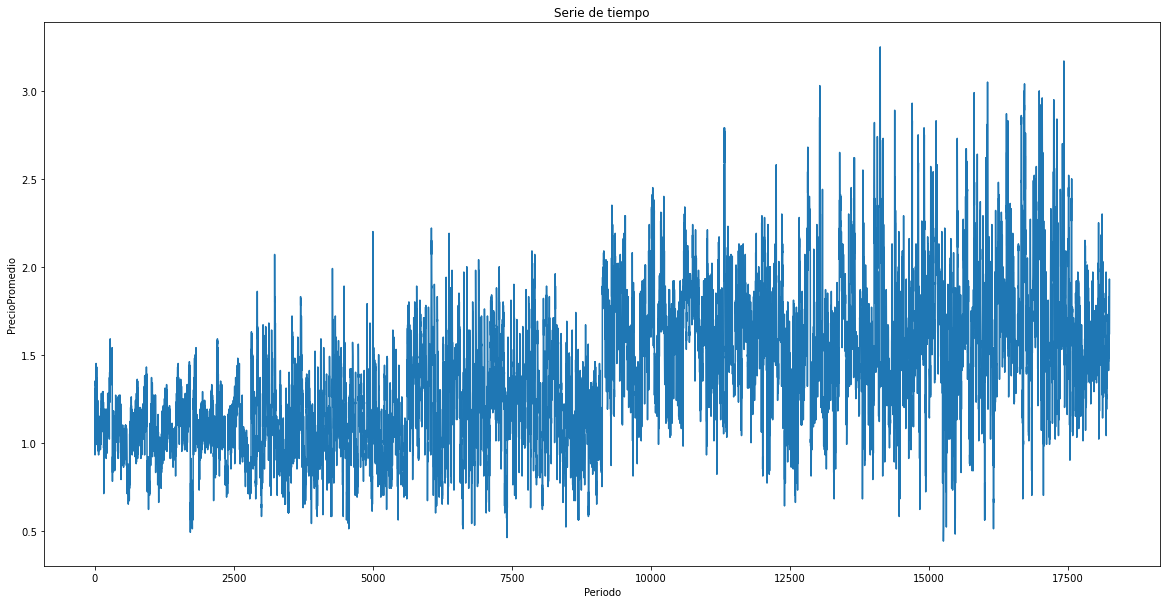

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df_avo.index, df_avo['AveragePrice'])
plt.xlabel("Periodo")
plt.ylabel("PrecioPromedio")
plt.title("Serie de tiempo")
plt.show()

In [21]:
df_avo['month']=df_avo['Date'].apply(lambda x:pd.Timestamp(x).strftime('%m'))
df_avo.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,year_month,month
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,12
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,12
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,12
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,12
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,11
5,5,2015-11-22,1.26,55979.78,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015-11,11
6,6,2015-11-15,0.99,83453.76,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015-11,11
7,7,2015-11-08,0.98,109428.33,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015-11,11
8,8,2015-11-01,1.02,99811.42,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015-11,11
9,9,2015-10-25,1.07,74338.76,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015-10,10


In [32]:
anual = df_avo.groupby(by=['year']).sum().reset_index()
anual

,year,Unnamed: 0,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015,143157,7723.94,4.385469e+09,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28
1,2016,143208,7517.80,4.820890e+09,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84
2,2017,148721,8669.56,4.934306e+09,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34
3,2018,7128,1746.40,1.382738e+09,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87


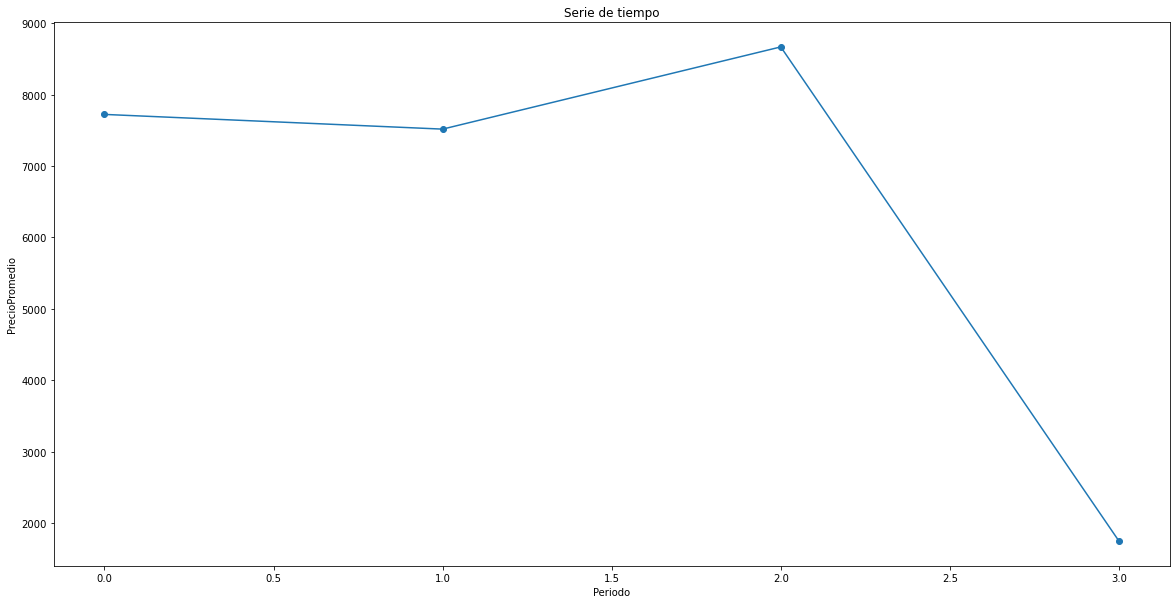

In [33]:
plt.figure(figsize=(20,10))
plt.plot(anual.index, anual['AveragePrice'], '-o')
plt.xlabel("Periodo")
plt.ylabel("PrecioPromedio")
plt.title("Serie de tiempo")
plt.show()

In [34]:
anual['MA'] = anual['AveragePrice'].rolling(window = 3).mean().shift(1)
anual

,year,Unnamed: 0,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,MA
0,2015,143157,7723.94,4.385469e+09,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28,NaN
1,2016,143208,7517.80,4.820890e+09,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84,NaN
2,2017,148721,8669.56,4.934306e+09,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34,NaN
3,2018,7128,1746.40,1.382738e+09,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87,7970.433333


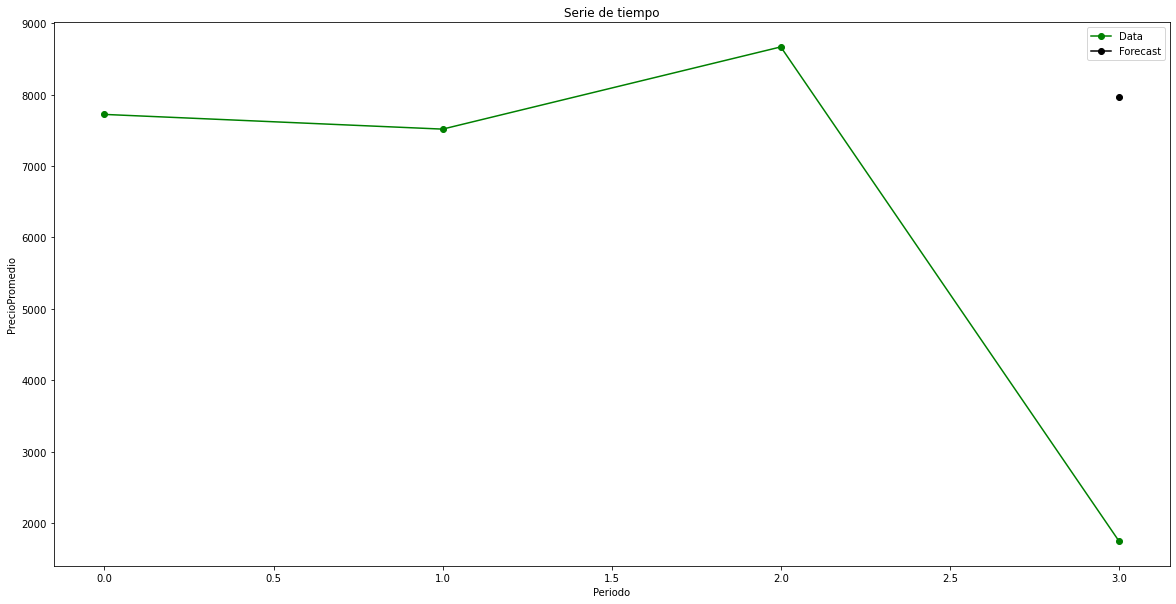

In [35]:
plt.figure(figsize=(20,10))
plt.plot(anual.index, anual['AveragePrice'], '-o', color = 'green', label = 'Data')
plt.plot(anual.index, anual['MA'], '-o', color = 'black', label = 'Forecast')
plt.xlabel("Periodo")
plt.ylabel("PrecioPromedio")
plt.title("Serie de tiempo")
plt.legend(loc = 'best')
plt.show()

In [39]:
anual.loc[len(anual)]=[int(anual.iloc[len(anual)-1][0])+1, 0, 0, 0, 0, 0, 0, 0, 0]
anual

,year,Unnamed: 0,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,MA
0,2015,143157,7723.94,4.385469e+09,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28,NaN
1,2016,143208,7517.80,4.820890e+09,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84,NaN
2,2017,148721,8669.56,4.934306e+09,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34,NaN
3,2018,7128,1746.40,1.382738e+09,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87,7970.433333
4,2019,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000


In [42]:
anual['MA'] = anual['AveragePrice'].rolling(window = 3).mean().shift(1)
anual['year'] = anual['year'].astype(int)
anual['AveragePrice'] = anual['AveragePrice'].astype(float)
anual['MA'] = anual['MA'].astype(float)
anual

,year,Unnamed: 0,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,MA
0,2015,143157,7723.94,4.385469e+09,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28,NaN
1,2016,143208,7517.80,4.820890e+09,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84,NaN
2,2017,148721,8669.56,4.934306e+09,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34,NaN
3,2018,7128,1746.40,1.382738e+09,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87,7970.433333
4,2019,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,5977.920000


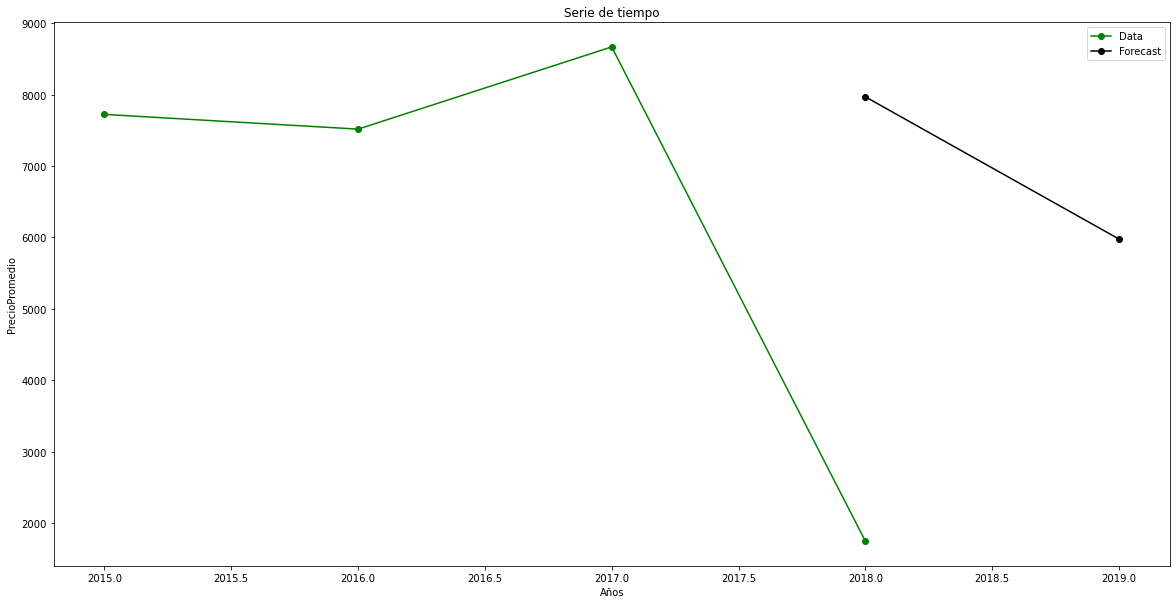

In [43]:
plt.figure(figsize=(20,10))
plt.plot(anual['year'][:-1], anual['AveragePrice'][:-1], '-o', color = 'green', label = 'Data')
plt.plot(anual['year'], anual['MA'], '-o', color = 'black', label = 'Forecast')
plt.xlabel("Años")
plt.ylabel("PrecioPromedio")
plt.title("Serie de tiempo")
plt.legend(loc = 'best')
plt.show()

In [45]:
for n in range(3):
    anual.loc[len(anual)]=[int(anual.iloc[len(anual)-1][0])+1, 0, 0, 0, 0, 0, 0, 0, 0]
anual

,year,Unnamed: 0,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,MA
0,2015,143157,7723.94,4.385469e+09,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28,NaN
1,2016,143208,7517.80,4.820890e+09,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84,NaN
2,2017,148721,8669.56,4.934306e+09,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34,NaN
3,2018,7128,1746.40,1.382738e+09,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87,7970.433333
4,2019,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,5977.920000
5,2020,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000
6,2021,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000
7,2022,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000


In [46]:
anual['MA'] = anual['AveragePrice'].rolling(window = 3).mean().shift(1)
anual['year'] = anual['year'].astype(int)
anual['AveragePrice'] = anual['AveragePrice'].astype(float)
anual['MA'] = anual['MA'].astype(float)
anual

,year,Unnamed: 0,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,MA
0,2015,143157,7723.94,4.385469e+09,7.721922e+08,6.346827e+08,1.320664e+08,5443128.28,NaN
1,2016,143208,7517.80,4.820890e+09,1.463159e+09,1.106494e+09,3.366263e+08,20038284.84,NaN
2,2017,148721,8669.56,4.934306e+09,1.646289e+09,1.222953e+09,3.993390e+08,23997172.34,NaN
3,2018,7128,1746.40,1.382738e+09,4.915359e+08,3.607414e+08,1.235840e+08,7210591.87,7970.433333
4,2019,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,5977.920000
5,2020,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,3471.986667
6,2021,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,582.133333
7,2022,0,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000


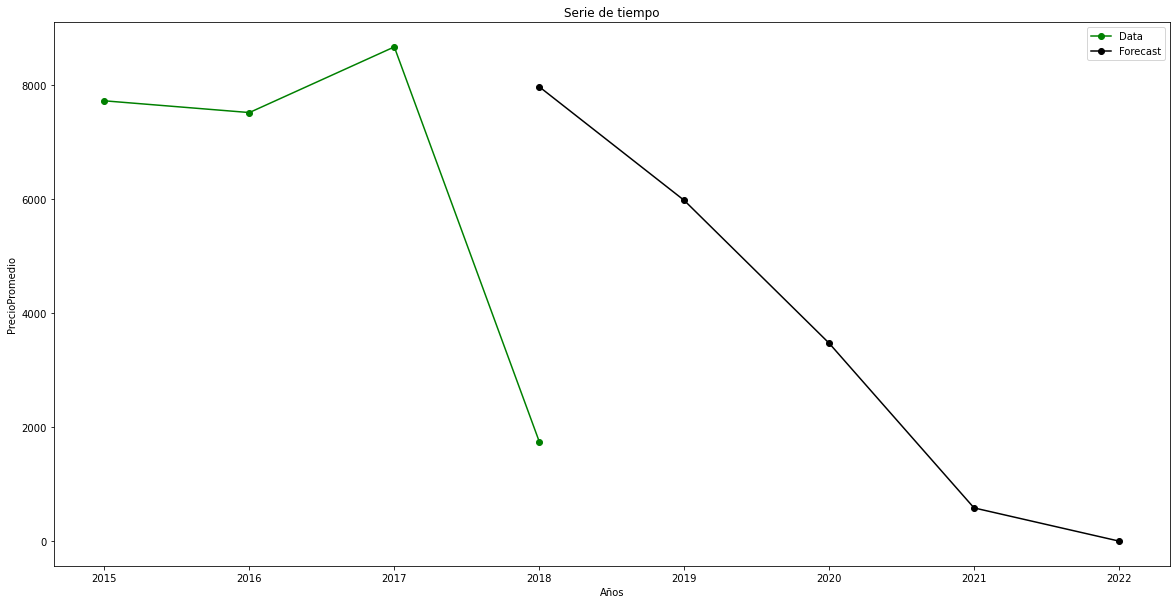

In [47]:
plt.figure(figsize=(20,10))
plt.plot(anual['year'][:-4], anual['AveragePrice'][:-4], '-o', color = 'green', label = 'Data')
plt.plot(anual['year'], anual['MA'], '-o', color = 'black', label = 'Forecast')
plt.xlabel("Años")
plt.ylabel("PrecioPromedio")
plt.title("Serie de tiempo")
plt.legend(loc = 'best')
plt.show()